# Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # data visualization library

# Data Cleaning Final


*   In the last tutorial (Data Collection & Data Cleaning), I realized I forgot to clean the "gender_pref", "reason", and "job" variables, so let's quickly clean them!



In [39]:
df = pd.read_csv("cleaned kpop data.csv")

In [40]:
# cleaning the gender preference column
df.gender_pref.value_counts()

i listen to both                       111
yes                                     68
its about the music, not the gender     54
no                                       7
Name: gender_pref, dtype: int64

In [41]:
pref = df['gender_pref']
pref_test = pref

pref_test = pref_test.apply(lambda x: x.lower())

In [42]:
# re-label gender_pref

# yes -> male
# no -> female
# both
# it's about music

for row in range(0, 240):
  if "yes" in pref_test.iloc[row]:
    pref_test.iloc[row] = "male"
  elif "no" in pref_test.iloc[row] and "not" not in pref_test.iloc[row]:
    pref_test.iloc[row] = "female"
  elif "music" in pref_test.iloc[row]:
    pref_test.iloc[row] = "it's about music"
  else:
    pref_test.iloc[row] = "both"

In [43]:
pref_test.value_counts()

both                111
male                 68
it's about music     54
female                7
Name: gender_pref, dtype: int64

In [44]:
# overwrite it to the original data frame
df['gender_pref'] = pref_test
df.gender_pref.value_counts()

both                111
male                 68
it's about music     54
female                7
Name: gender_pref, dtype: int64

In [45]:
# cleaning the reason column 
df.reason.value_counts()

its different from the usual music. i like something new for a change                                                                                                                                                                                                                                                                                                                                              87
its different from the usual music. i like something new for a change;the videos are unique;choreography is unique;the idols are very attractive                                                                                                                                                                                                                                                                   40
its different from the usual music. i like something new for a change;the videos are unique;choreography is unique                                                                          

In [46]:
reason = df['reason']
reason_test = reason

reason_test = reason_test.apply(lambda x: x.lower())

In [47]:
# re-label reason

# different from the usual music
# choreography is unique
# idols are attractive
# many reasons
# others

for row in range(0, 240):
  if "its different from the usual music. i like something new for a change" in reason_test.iloc[row] and ";" not in reason_test.iloc[row]:
    reason_test.iloc[row] = "unique music style"
  elif "choreagraphy is unique" in reason_test.iloc[row] and ";" not in reason_test.iloc[row]:
    reason_test.iloc[row] = "unique choreography"
  elif "idols are very attractive" in reason_test.iloc[row] and ";" not in reason_test.iloc[row]:
    reason_test.iloc[row] = "attractive idols"
  elif ";" in reason_test.iloc[row]:
    reason_test.iloc[row] = "many reasons"
  else:
    reason_test.iloc[row] = "other reason(s)"

In [48]:
reason_test.value_counts()

many reasons          106
unique music style     87
other reason(s)        44
attractive idols        3
Name: reason, dtype: int64

In [49]:
# overwrite it to the original dataframe
df['reason'] = reason_test
df.reason.value_counts()

many reasons          106
unique music style     87
other reason(s)        44
attractive idols        3
Name: reason, dtype: int64

In [50]:
df.job.value_counts()

student                                                                      206
caregiver                                                                      2
berklee student                                                                1
college student/dietary aide                                                   1
elementary school office worker                                                1
worker                                                                         1
teacher                                                                        1
disney cast member                                                             1
chef                                                                           1
nursing/medical                                                                1
college professor                                                              1
to either be a designer, artist or an animator.                                1
bartender                   

In [51]:
# cleaning the job column
job = df['job']
job_test = job

job_test = job_test.apply(lambda x: x.lower())

In [52]:
# re-label job

# student
# full-time worker
# unemployed

for row in range(0, 240):
  if "no" in job_test.iloc[row] or "unemployed" in job_test.iloc[row] or "don't" in job_test.iloc[row]:
    job_test.iloc[row] = "unemployed"
  elif "student" in job_test.iloc[row]:
    job_test.iloc[row] = "student"
  else:
    job_test.iloc[row] = "full-time worker"

In [53]:
job_test.value_counts()

student             210
full-time worker     27
unemployed            3
Name: job, dtype: int64

In [54]:
# overwrite it to the original data frame
df.job = job_test
df.job.value_counts()

student             210
full-time worker     27
unemployed            3
Name: job, dtype: int64

In [55]:
df.head()

,fav_grp,popl_by_co_yn,reason,yr_listened,gender_pref,daily_music_hr,watch_MV_yn,daily_MV_hr,obsessed_yn,news_medium,...,yr_merch_spent,money_src,concert_yn,crazy_ev,age,country,job,gender,num_gr_like,bts_vs_others
0,bts,its gaining popularity,unique music style,1.5,it's about music,5.0,yes,2.5,not sure,youtube,...,75,full-time job,yes,others (combination of not studying/working an...,18,uk,full-time worker,female,1,bts
1,bts,its gaining popularity,many reasons,3.5,both,3.0,yes,2.5,yes,youtube,...,50,part-time job,"i want to, but the k-pop groups don't come to ...",others (combination of not studying/working an...,18,uk,student,female,1,bts
2,"bts,monsta x",its gaining popularity,many reasons,4.0,it's about music,3.0,yes,2.5,no,"social media (twitter, instagram)",...,75,part-time job,yes,nothing,18,other european countries,student,female,2,bts
3,bts,its gaining popularity,unique music style,3.5,both,5.0,yes,3.5,no,youtube,...,75,part-time job,yes,nothing,24,usa,student,female,1,bts
4,bts,yes,unique music style,3.5,male,5.0,yes,2.5,not sure,youtube,...,150,from parents,"i want to, but the k-pop groups don't come to ...",nothing,18,usa,student,female,1,bts


In [56]:
# save the fully cleaned dataset
df.to_csv("fully cleaned kpop data.csv", index = False)

# Analyzing Continuous Variables (using histogram, boxplots, and correlation matrix)

In [57]:
df = pd.read_csv("/content/fully cleaned kpop data.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/fully cleaned kpop data.csv'

In [58]:
df.shape

(240, 24)

In [59]:
df.head()

,fav_grp,popl_by_co_yn,reason,yr_listened,gender_pref,daily_music_hr,watch_MV_yn,daily_MV_hr,obsessed_yn,news_medium,...,yr_merch_spent,money_src,concert_yn,crazy_ev,age,country,job,gender,num_gr_like,bts_vs_others
0,bts,its gaining popularity,unique music style,1.5,it's about music,5.0,yes,2.5,not sure,youtube,...,75,full-time job,yes,others (combination of not studying/working an...,18,uk,full-time worker,female,1,bts
1,bts,its gaining popularity,many reasons,3.5,both,3.0,yes,2.5,yes,youtube,...,50,part-time job,"i want to, but the k-pop groups don't come to ...",others (combination of not studying/working an...,18,uk,student,female,1,bts
2,"bts,monsta x",its gaining popularity,many reasons,4.0,it's about music,3.0,yes,2.5,no,"social media (twitter, instagram)",...,75,part-time job,yes,nothing,18,other european countries,student,female,2,bts
3,bts,its gaining popularity,unique music style,3.5,both,5.0,yes,3.5,no,youtube,...,75,part-time job,yes,nothing,24,usa,student,female,1,bts
4,bts,yes,unique music style,3.5,male,5.0,yes,2.5,not sure,youtube,...,150,from parents,"i want to, but the k-pop groups don't come to ...",nothing,18,usa,student,female,1,bts


In [60]:
# check the description of the continuous variables (numeric values) to get the hang of the dataset
df.describe()

,yr_listened,daily_music_hr,daily_MV_hr,yr_merch_spent,age,num_gr_like
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,3.193750,4.368750,1.954167,85.895833,18.212500,2.033333
std,1.506944,2.146434,1.054966,118.231076,3.488272,2.968265
min,1.000000,0.500000,1.000000,0.000000,12.000000,1.000000
25%,1.500000,3.000000,1.000000,50.000000,18.000000,1.000000
50%,3.500000,5.000000,2.500000,50.000000,18.000000,1.000000
75%,4.000000,5.000000,2.500000,75.000000,18.000000,2.000000
max,14.000000,10.000000,4.500000,500.000000,29.000000,37.000000


In [61]:
# initialize continuous variables
df_cont = df[["yr_listened", "daily_music_hr", "daily_MV_hr", "yr_merch_spent", "age", "num_gr_like"]]

<AxesSubplot:>

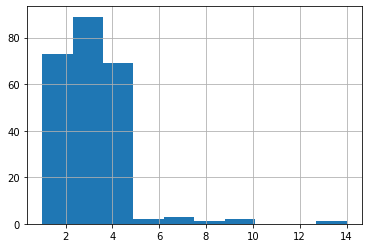

In [62]:
# histogram of years listened column - kinda right-skewed
df.yr_listened.hist()

<AxesSubplot:>

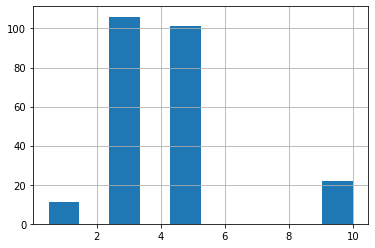

In [63]:
# histogram of daily music hr - normal dist
df.daily_music_hr.hist()

<AxesSubplot:>

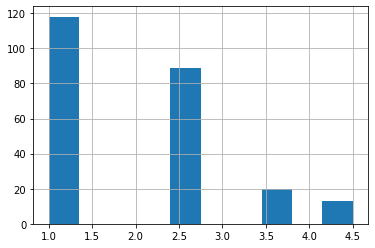

In [64]:
# histgoram of daily MV hr - right skewed
df.daily_MV_hr.hist()

<AxesSubplot:>

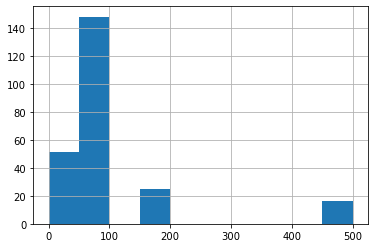

In [65]:
# histogram of yr merch spent - close to normal
df.yr_merch_spent.hist()

<AxesSubplot:>

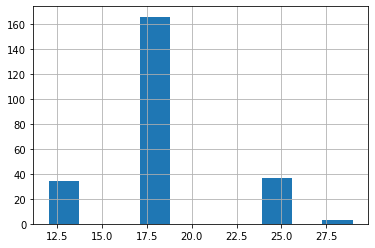

In [66]:
# histogram of age - normal
df.age.hist()

<AxesSubplot:>

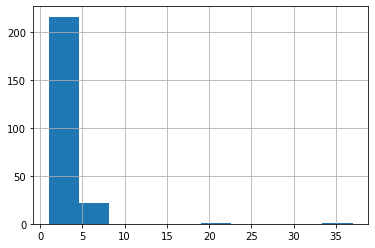

In [67]:
# histogram of num grps each person likes - right skewed
df.num_gr_like.hist()

Checking boxplots to detect outliers

<AxesSubplot:>

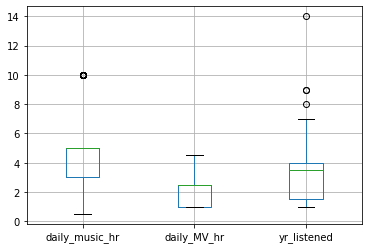

In [68]:
df.boxplot(column= ["daily_music_hr", "daily_MV_hr", "yr_listened"]) 
  # yr_listened has some outliers

<AxesSubplot:>

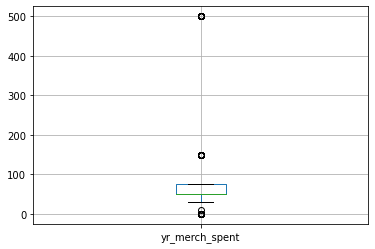

In [69]:
df.boxplot(column = "yr_merch_spent") # some outliers

<AxesSubplot:>

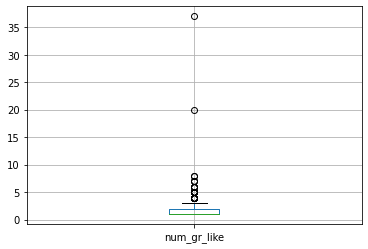

In [70]:
df.boxplot(column = "num_gr_like") # a lot of outliers

Remove outliers and check the distributions again

<AxesSubplot:>

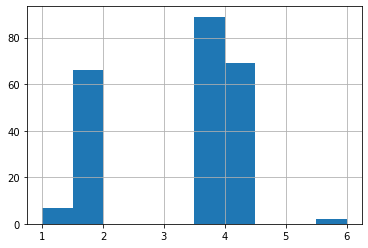

In [71]:
# yr_listened
df_yr_listen_no_outlier = df[df.yr_listened < 7]
df_yr_listen_no_outlier.yr_listened.hist()

<AxesSubplot:>

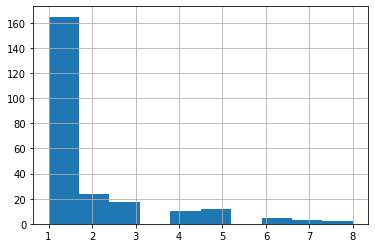

In [72]:
# num_gr_like
df_num_gr_no_outlier = df[df.num_gr_like < 10]
df_num_gr_no_outlier.num_gr_like.hist()

Checking correlation among the continuous variables

In [73]:
# checking correlation is important as we want to see what variables are correlated
# we don't want multicollinearity when building models
df[["yr_listened", "daily_music_hr", "daily_MV_hr", "yr_merch_spent", "age", "num_gr_like"]].corr()

,yr_listened,daily_music_hr,daily_MV_hr,yr_merch_spent,age,num_gr_like
yr_listened,1.000000,0.119141,0.018111,0.161473,0.121877,0.056078
daily_music_hr,0.119141,1.000000,0.152544,0.221685,-0.080921,0.191467
daily_MV_hr,0.018111,0.152544,1.000000,0.093754,-0.121273,0.160830
yr_merch_spent,0.161473,0.221685,0.093754,1.000000,0.010443,-0.009862
age,0.121877,-0.080921,-0.121273,0.010443,1.000000,0.017498
num_gr_like,0.056078,0.191467,0.160830,-0.009862,0.017498,1.000000


<AxesSubplot:>

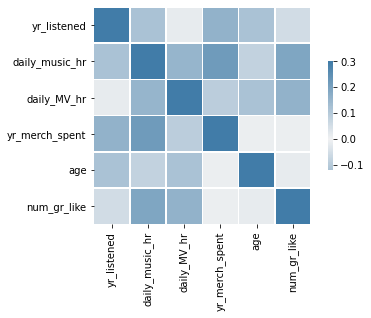

In [74]:
cmap = sns.diverging_palette(600, 600, as_cmap=True)
sns.heatmap(df[["yr_listened", "daily_music_hr", "daily_MV_hr", "yr_merch_spent", "age", "num_gr_like"]].corr(), 
            cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the correlation above, we can see these relationships:

1.   Number of years they listened to k-pop is positively correlated with number of hours they listen to k-pop, money they spend on merchandise, and age. 
2.   The number of hours k-pop fans spend on watching k-pop youtube music video is positiely correlated with the number of hours they listen to k-pop music
3.   The more time they spend on listening to k-pop, the more money they spend on purchasing k-pop merchandise.
4.   The more k-pop youtube videos they watch and the more k-pop they listen, the more groups they like.
5.   The younger they are, the more time the spend on listening to k-pop and watching k-pop videos.
6.   Age has nothing to do with how much money they spend on purchasing k-pop merchandise per year.



# Analyzing Categorical Variables (using Bar Charts and Pivot Tables)


In [75]:
df.columns

Index(['fav_grp', 'popl_by_co_yn', 'reason', 'yr_listened', 'gender_pref',
       'daily_music_hr', 'watch_MV_yn', 'daily_MV_hr', 'obsessed_yn',
       'news_medium', 'pursuit', 'time_cons_yn', 'life_chg', 'pos_eff',
       'yr_merch_spent', 'money_src', 'concert_yn', 'crazy_ev', 'age',
       'country', 'job', 'gender', 'num_gr_like', 'bts_vs_others'],
      dtype='object')

In [76]:
# dataframe for categorical variables
df_cat = df[["fav_grp", 'popl_by_co_yn', 'reason', 'gender_pref','watch_MV_yn','obsessed_yn',
       'news_medium', 'pursuit', 'time_cons_yn', 'life_chg', 'pos_eff', 'money_src', 'concert_yn', 
       'crazy_ev','country', 'job', 'gender', 'bts_vs_others']]

# Bar Charts

In [77]:
# pivot table ideas
# kpop popularity by contry and country
# daily music hour/daily MV hr and reason
# gender prefrence and how much money they spend on merchandise
# obsession and daily music/MV hour


graph for fav_grp: total = 15


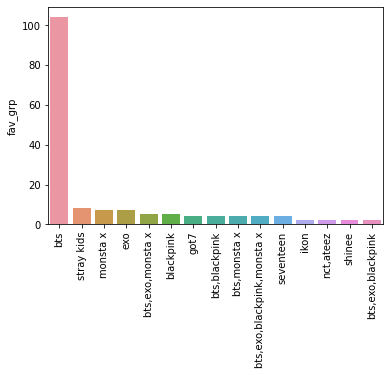

graph for popl_by_co_yn: total = 4


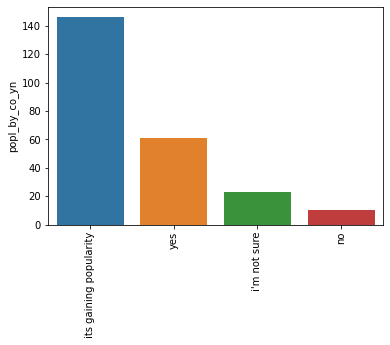

graph for reason: total = 4


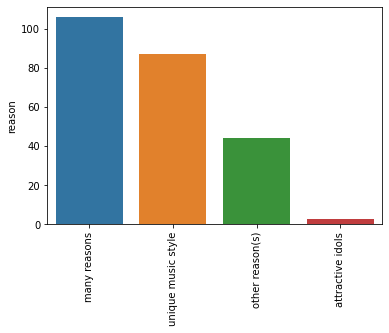

graph for gender_pref: total = 4


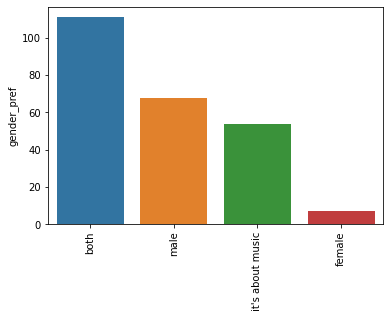

graph for watch_MV_yn: total = 2


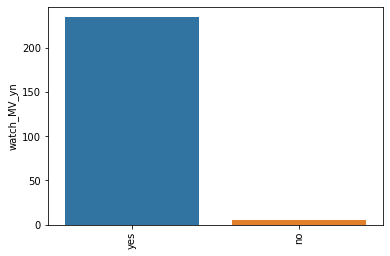

graph for obsessed_yn: total = 3


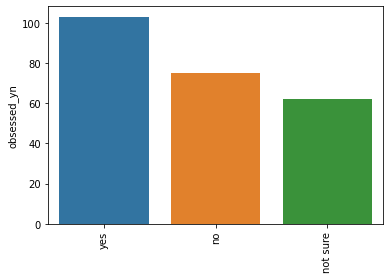

graph for news_medium: total = 3


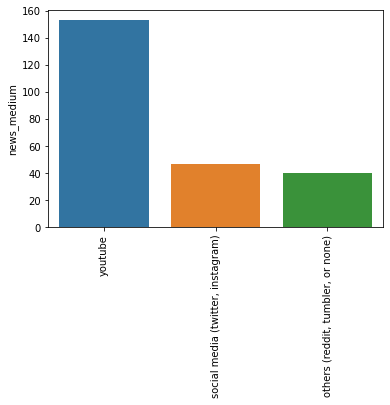

graph for pursuit: total = 6


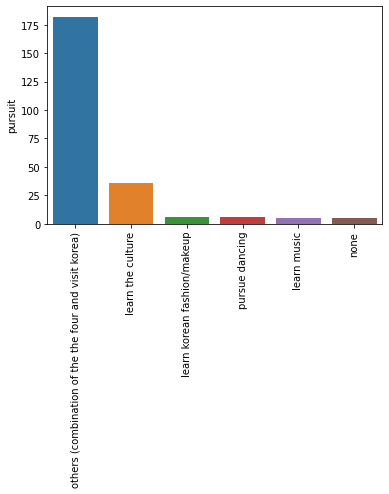

graph for time_cons_yn: total = 3


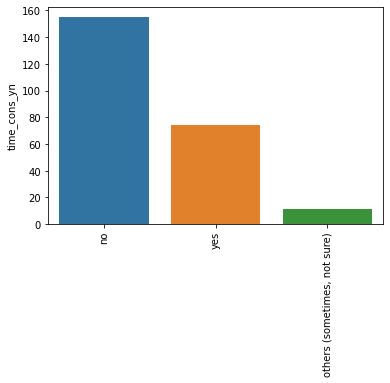

graph for life_chg: total = 5


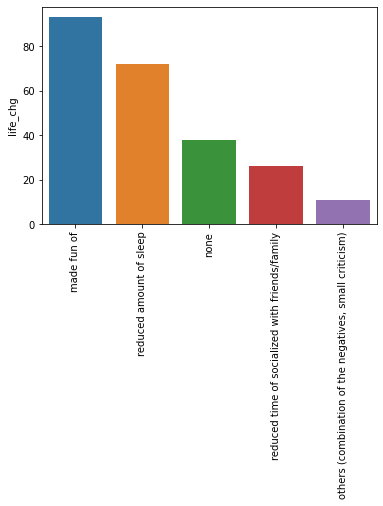

graph for pos_eff: total = 4


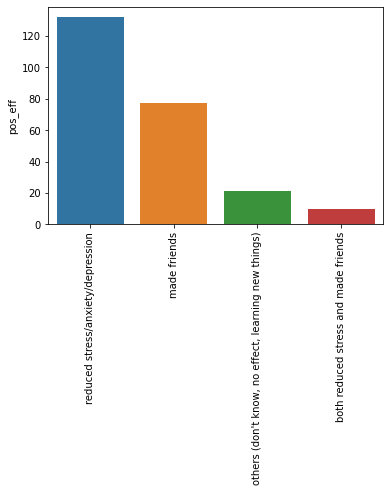

graph for money_src: total = 5


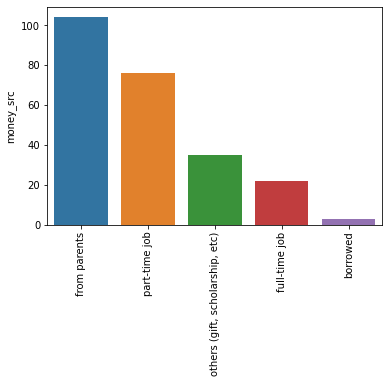

graph for concert_yn: total = 3


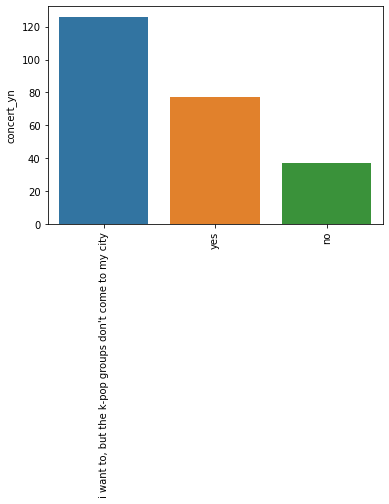

graph for crazy_ev: total = 3


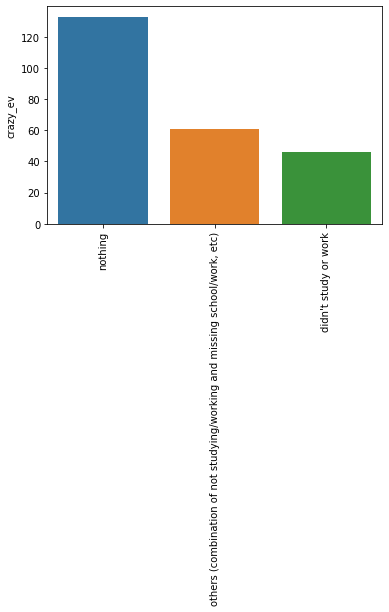

graph for country: total = 10


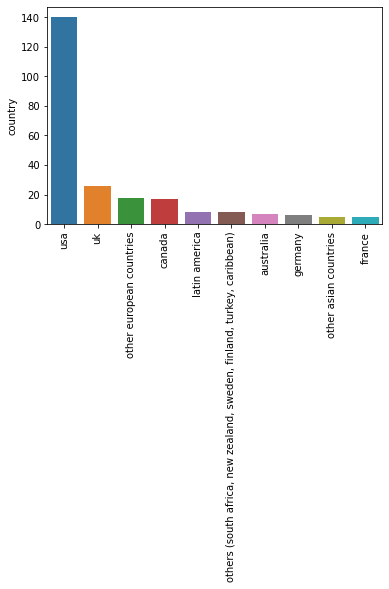

graph for job: total = 3


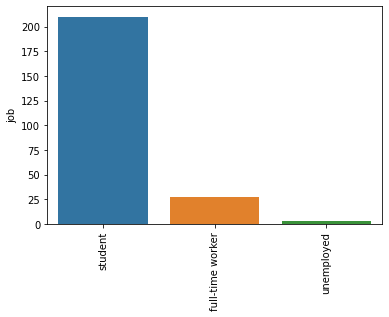

graph for gender: total = 3


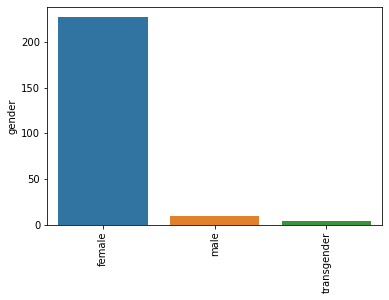

graph for bts_vs_others: total = 1


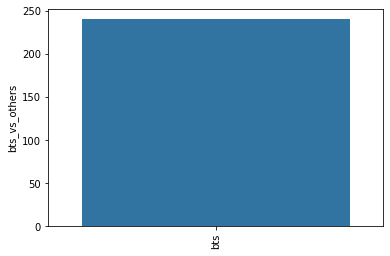

In [78]:
# bar chart for cat variables (borrowed from Ken Jee's Data Science Salary Code)
for i in df_cat.columns:
  cat_num = df_cat[i].value_counts()[:15] # just take top 15 for fav group
  print("graph for %s: total = %d" % (i, len(cat_num)))
  chart = sns.barplot(x=cat_num.index, y=cat_num)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90) #rotation = 90 rotates the x-labels vertically
  plt.show()

# Pivot Tables

In [79]:
df.columns

Index(['fav_grp', 'popl_by_co_yn', 'reason', 'yr_listened', 'gender_pref',
       'daily_music_hr', 'watch_MV_yn', 'daily_MV_hr', 'obsessed_yn',
       'news_medium', 'pursuit', 'time_cons_yn', 'life_chg', 'pos_eff',
       'yr_merch_spent', 'money_src', 'concert_yn', 'crazy_ev', 'age',
       'country', 'job', 'gender', 'num_gr_like', 'bts_vs_others'],
      dtype='object')

Relationship between listening/watching kpop and positive effect

In [80]:
pd.pivot_table(df, index = "pos_eff", 
               values = ["daily_MV_hr", "daily_music_hr"]).sort_values('daily_MV_hr', ascending = False)

,daily_MV_hr,daily_music_hr
pos_eff,,
both reduced stress and made friends,2.650000,4.650000
reduced stress/anxiety/depression,1.988636,4.473485
made friends,1.837662,4.012987
"others (don't know, no effect, learning new things)",1.833333,4.880952


Relationship between listening/watching kpop and obsession


In [81]:
pd.pivot_table(df, index = "obsessed_yn", 
               values = ["daily_MV_hr", "daily_music_hr"]).sort_values('daily_music_hr', ascending = False)

,daily_MV_hr,daily_music_hr
obsessed_yn,,
yes,2.087379,4.762136
not sure,2.201613,4.080645
no,1.566667,4.066667


Relationship between going to concert and money they spend on k-pop merchandise

In [82]:
# most money goes to purchasing concert tickets 
pd.pivot_table(df, index = "concert_yn", values = "yr_merch_spent")

,yr_merch_spent
concert_yn,
"i want to, but the k-pop groups don't come to my city",66.388889
no,53.378378
yes,133.441558


In [83]:
df.columns

Index(['fav_grp', 'popl_by_co_yn', 'reason', 'yr_listened', 'gender_pref',
       'daily_music_hr', 'watch_MV_yn', 'daily_MV_hr', 'obsessed_yn',
       'news_medium', 'pursuit', 'time_cons_yn', 'life_chg', 'pos_eff',
       'yr_merch_spent', 'money_src', 'concert_yn', 'crazy_ev', 'age',
       'country', 'job', 'gender', 'num_gr_like', 'bts_vs_others'],
      dtype='object')

Pivot table - daily music hr vs - everything else

In [84]:
df_columns = df[['fav_grp', 'popl_by_co_yn', 'reason', 'yr_listened', 'gender_pref',
       'watch_MV_yn', 'daily_MV_hr', 'obsessed_yn',
       'news_medium', 'pursuit', 'time_cons_yn', 'life_chg', 'pos_eff',
       'yr_merch_spent', 'money_src', 'concert_yn', 'crazy_ev',
       'country', 'job', 'gender', 'num_gr_like', 'bts_vs_others','age', 'daily_music_hr']]

In [85]:
for i in df_columns.columns:
    print(i)
    print(pd.pivot_table(df_columns, index = i, values = 'daily_music_hr').sort_values("daily_music_hr", ascending = False))

fav_grp
                                                    daily_music_hr
fav_grp                                                           
wanna one                                                    10.00
bts,blackpink,stray kids,got7                                10.00
bts,exo,monsta x,shinee,red velvet,mamamoo,twic...           10.00
bts,exo,monsta x,ateez,nct,got7 too many to count            10.00
bts,exo,blackpink,monsta x,shinee,a.c.e                      10.00
...                                                            ...
bts,exo,blackpink,monsta x,i'm open to enjoying...            3.00
bts,the black skirts                                          3.00
bts,loona                                                     3.00
twice                                                         1.75
seventeen,twice                                               0.50

[86 rows x 1 columns]
popl_by_co_yn
                        daily_music_hr
popl_by_co_yn                         
yes   

ValueError: Grouper for 'daily_music_hr' not 1-dimensional

Relationship between age and positive effects & life change

In [ ]:
pd.pivot_table(df_columns, index = "pos_eff", columns = "life_chg", values = "age")

In [ ]:
pd.pivot_table(df_columns, index = "concert_yn", columns = "bts_vs_others", values = "yr_merch_spent")

In [ ]:
pd.pivot_table(df_columns, index = ["concert_yn", "bts_vs_others"], columns = "country", values = "yr_merch_spent")